<h1><u><font color = green><center> Sea Level Analysis </center></font></u></h1>


The current study is focused on the investigation of how sea levels are changed, with measurements from estuaries serving as the primary source of information. The varying depths within estuaries exert an influence on the entirety of the estuary environment. Additionally, the movement of water and the interactions of organisms and sediments are affected by the depths of these regions.Carefully studying the depths of estuaries is likely to give us a good understanding of how sea levels have changed throughout history. The reasons behind the fluctuations in sea levels are aimed to be comprehended through this analysis. The impacts of human activities and factors like climate change on sea level alterations are also being explored. The objective is to elucidate how human actions could potentially expedite the rise of sea levels, leading to a comprehensive understanding of the shaping forces affecting coastal regions.


---


## A. Data preprocessing and statistical analysis

### 1. Importing the required libraries for EDA

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error


---


### 2. Loading the data set into a data frame.

In [67]:
# This helps read the CSV data file
data = pd.read_csv("tidal_wetland_estuaries.csv")

In [68]:
data.head()

,edacda,name,coast,wet_area_hi,stock_0-15_Lo,stock_0-15_Hi,awd_0-15,estu_area,estu_latitude,estu_longintude,...,river_total_c_flux_total_wetl,sparrow_total_wet_area,river_total_p_flux,estu_vol,tide_vol,tide_flow,tau_salt,tau_flush,mean_precip,mean_temp
0,G010,Florida Bay,GULF,330.3,0.3,4.3,0.087,2.000000e+09,25.039940,-80.731770,...,60000000.0,3.000000e+09,-9999,1.000000e+09,500000000.0,1.000000e+09,820.396794,1.033333,1251.831801,24.594719
1,G020,South Ten Thousand Islands,GULF,893.8,0.0,0.0,0.000,2.000000e+08,25.311330,-81.057020,...,20000000.0,5.000000e+08,-9999,1.000000e+08,100000000.0,3.000000e+08,710.434076,0.508065,1355.907147,24.320596
2,G030,North Ten Thousand Islands,GULF,924.9,3.0,11.6,0.084,4.000000e+08,25.724280,-81.377640,...,100000000.0,5.000000e+09,-9999,3.000000e+08,300000000.0,6.000000e+08,323.827587,0.450617,1416.239789,23.873671
3,G040,Rookery Bay,GULF,75.1,1.0,1.0,0.086,3.000000e+07,25.998750,-81.756010,...,10000000.0,9.000000e+08,-9999,2.000000e+07,20000000.0,4.000000e+07,168.626356,0.480769,1432.519416,23.510000
4,G050,Charlotte Harbor,GULF,222.5,2.4,2.4,0.073,6.000000e+08,26.754031,-82.103018,...,50000000.0,5.000000e+08,-9999,9.000000e+08,300000000.0,7.000000e+08,20.419069,1.318674,1320.275690,22.869199


In [69]:
data.tail(5)

,edacda,name,coast,wet_area_hi,stock_0-15_Lo,stock_0-15_Hi,awd_0-15,estu_area,estu_latitude,estu_longintude,...,river_total_c_flux_total_wetl,sparrow_total_wet_area,river_total_p_flux,estu_vol,tide_vol,tide_flow,tau_salt,tau_flush,mean_precip,mean_temp
110,S160,St.Andrew/St.Simons Sounds,EAST,551.8,9.7,10.0,0.120,200000000.0,31.06815,-81.43277,...,40000000.0,600000000.0,-9999,7.000000e+08,400000000.0,800000000.0,46.629175,0.900068,1242.011293,19.307519
111,S170,St.Marys River/Cumberland Sound,EAST,184.7,3.0,3.0,0.110,60000000.0,30.75114,-81.48440,...,10000000.0,30000000.0,-9999,2.000000e+08,100000000.0,200000000.0,10.188055,0.933463,1297.394187,20.073498
112,S180,St.Johns River,EAST,78.7,1.0,1.1,0.096,700000000.0,29.75922,-81.55201,...,50000000.0,300000000.0,-9999,2.000000e+09,500000000.0,900000000.0,67.059527,1.639203,1306.451175,20.939567
113,S190,Indian River,EAST,143.6,0.9,0.9,0.044,900000000.0,28.11109,-80.60166,...,30000000.0,800000000.0,-9999,7.000000e+08,300000000.0,600000000.0,52.199437,1.199160,1319.580665,22.461389
114,S200,Biscayne Bay,EAST,131.8,1.2,1.6,0.082,700000000.0,25.55342,-80.27768,...,10000000.0,200000000.0,-9999,9.000000e+08,300000000.0,600000000.0,48.744516,1.328731,1307.669910,23.944760



---


### 3. Checking the data types of the data.

In [70]:
print("Dataset Overview:")
data.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   edacda                         115 non-null    object 
 1   name                           115 non-null    object 
 2   coast                          115 non-null    object 
 3   wet_area_hi                    115 non-null    float64
 4   stock_0-15_Lo                  115 non-null    float64
 5   stock_0-15_Hi                  115 non-null    float64
 6   awd_0-15                       115 non-null    float64
 7   estu_area                      115 non-null    float64
 8   estu_latitude                  115 non-null    float64
 9   estu_longintude                115 non-null    float64
 10  estu_dep                       115 non-null    float64
 11  estu_perim                     115 non-null    float64
 12  land_area                      1

In [71]:
data.dtypes

edacda                            object
name                              object
coast                             object
wet_area_hi                      float64
stock_0-15_Lo                    float64
stock_0-15_Hi                    float64
awd_0-15                         float64
estu_area                        float64
estu_latitude                    float64
estu_longintude                  float64
estu_dep                         float64
estu_perim                       float64
land_area                        float64
land_latitude                    float64
land_longitude                   float64
land_mean_elev                   float64
land_max_elev                    float64
urban_area                       float64
agri_area                        float64
forest_area                      float64
nontidal_wetl_area               float64
range_area                       float64
barren_area                        int64
population                         int64
tide_ht         


---



### 4. Droping unnecessary columns

From information regarding the data set above, the columns present are very many and some are not even relevant for this analysis. 

For this, there needs to be a way in which only the columns relevant to this analysis are selected and their output run. For this reason, columns that obviously look like they aren't related to sea level rise will be droped.

In [72]:
# The code above will only take in columns relevant to this analysis and drop the rest moving forward

Columns_necessary_for_analysis = ["wet_area_hi", "stock_0-15_Lo", "stock_0-15_Hi", "awd_0-15", "estu_area", "estu_latitude",
                                  "estu_longintude","population", "tide_ht", "daily_precip", "daily_evap", "freshwater_area", 
                                  "mix_area", "saltwater_area", "river_flow", "mean_temp", "tide_flow","estu_dep", 
                                  "estu_salinity", "coast"]
# Above is the list of columns that are speculated to be necessary, the rest of the columns need to be dropped
# For this an array with the rest of the columns needs to be generated

# Creating a list of all column names as follows:
column_list = list(data.columns)

# Convert the list to a string with the desired format
formatted_list = str(column_list)


# Create a new list with items removed
filtered_column_list = [col for col in column_list if col not in Columns_necessary_for_analysis]

# Convert the filtered list to a string with the desired format
formatted_list = str(filtered_column_list)

# Print the formatted list
print(formatted_list)


items_list = eval(formatted_list)
# Count the number of items in the list
count = len(items_list)
# Print the count
print("Number of items removed from the list:", count)

['edacda', 'name', 'estu_perim', 'land_area', 'land_latitude', 'land_longitude', 'land_mean_elev', 'land_max_elev', 'urban_area', 'agri_area', 'forest_area', 'nontidal_wetl_area', 'range_area', 'barren_area', 'ocean_salinity_mean', 'ocean_salinity_max', 'ocean_salinity_min', 'air_temp_mean', 'frost_days_per_yr', 'windspeed', 'ocean_sst_mean', 'ocean_diss_inorg_p', 'ocean_no3', 'typl_1', 'wetland_area', 'river_total_n_flux', 'river_total_c_flux', 'river_total_c_flux_total_wetl', 'sparrow_total_wet_area', 'river_total_p_flux', 'estu_vol', 'tide_vol', 'tau_salt', 'tau_flush', 'mean_precip']
Number of items removed from the list: 35


Above is an array of 35 column names that need to be droped.
The items will be dropped as follows:

In [73]:
data = data.drop(['edacda', 'name', 'estu_perim', 'land_area', 'land_latitude', 'land_longitude', 'land_mean_elev', 'land_max_elev', 'urban_area', 'agri_area', 'forest_area', 'nontidal_wetl_area', 'range_area', 'barren_area', 'ocean_salinity_mean', 'ocean_salinity_max', 'ocean_salinity_min', 'air_temp_mean', 'frost_days_per_yr', 'windspeed', 'ocean_sst_mean', 'ocean_diss_inorg_p', 'ocean_no3', 'typl_1', 'wetland_area', 'river_total_n_flux', 'river_total_c_flux', 'river_total_c_flux_total_wetl', 'sparrow_total_wet_area', 'river_total_p_flux', 'estu_vol', 'tide_vol', 'tau_salt', 'tau_flush', 'mean_precip'], axis=1)
data.head(5)

,coast,wet_area_hi,stock_0-15_Lo,stock_0-15_Hi,awd_0-15,estu_area,estu_latitude,estu_longintude,estu_dep,population,tide_ht,daily_precip,daily_evap,freshwater_area,mix_area,saltwater_area,estu_salinity,river_flow,tide_flow,mean_temp
0,GULF,330.3,0.3,4.3,0.087,2.000000e+09,25.039940,-80.731770,0.62000,3421,0.300000,5380000,5130000,0,20000000.0,2.000000e+09,29.000000,0.0,1.000000e+09,24.594719
1,GULF,893.8,0.0,0.0,0.000,2.000000e+08,25.311330,-81.057020,0.63000,235792,0.620000,775000,691000,0,100000000.0,1.000000e+08,21.000000,0.0,3.000000e+08,24.320596
2,GULF,924.9,3.0,11.6,0.084,4.000000e+08,25.724280,-81.377640,0.73000,9268,0.810000,1380000,1160000,0,50000000.0,3.000000e+08,27.000000,0.0,6.000000e+08,23.873671
3,GULF,75.1,1.0,1.0,0.086,3.000000e+07,25.998750,-81.756010,0.50000,14858,0.520000,123000,103000,0,500000.0,3.000000e+07,29.000000,0.0,4.000000e+07,23.510000
4,GULF,222.5,2.4,2.4,0.073,6.000000e+08,26.754031,-82.103018,1.65938,597644,0.612393,1962000,1624000,1004000,300000000.0,3.000000e+08,20.801683,20000000.0,7.000000e+08,22.869199


The result is now a clean dataset with 20 columns relevant to estuarine data.


---


### 5. The summarry Statistics of the data

In [74]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,wet_area_hi,stock_0-15_Lo,stock_0-15_Hi,awd_0-15,estu_area,estu_latitude,estu_longintude,estu_dep,population,tide_ht,daily_precip,daily_evap,freshwater_area,mix_area,saltwater_area,estu_salinity,river_flow,tide_flow,mean_temp
count,115.000000,115.000000,115.000000,115.000000,1.150000e+02,115.000000,115.000000,115.000000,1.150000e+02,115.000000,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,115.000000,1.150000e+02,1.150000e+02,115.000000
mean,197.898261,1.794783,2.050435,0.060043,6.225791e+08,-51.115750,-177.084904,-80.334929,1.775321e+06,-85.670637,2.219425e+06,1.364779e+06,4.229899e+07,3.201923e+08,2.693490e+08,-66.014002,3.505835e+07,1.020565e+09,15.343793
std,368.389354,3.442889,3.825019,0.028455,1.264792e+09,935.805299,924.145577,933.138701,7.099172e+06,932.532194,4.532854e+06,2.689129e+06,1.401736e+08,1.053433e+09,4.976001e+08,934.411341,1.189273e+08,1.980897e+09,5.379997
min,0.200000,0.000000,0.000000,0.000000,6.000000e+05,-9999.000000,-9999.000000,-9999.000000,-9.999000e+03,-9999.000000,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9999.000000,-1.000000e+04,-1.000000e+04,5.812948
25%,6.450000,0.000000,0.000000,0.044000,4.000000e+07,29.978250,-117.134765,1.410000,2.499900e+04,0.505000,1.425000e+05,6.980000e+04,0.000000e+00,2.500000e+06,6.000000e+06,15.000000,1.500000e+06,8.000000e+07,10.391126
50%,44.500000,0.300000,0.300000,0.063000,2.000000e+08,34.726780,-82.505370,2.690000,2.157740e+05,1.100000,7.080000e+05,4.350000e+05,0.000000e+00,3.000000e+07,6.000000e+07,22.000000,5.000000e+06,3.000000e+08,16.688636
75%,196.350000,1.500000,1.900000,0.083000,6.500000e+08,42.764765,-75.191370,5.010000,1.336687e+06,1.803519,2.195000e+06,1.485000e+06,4.433000e+06,2.000000e+08,3.000000e+08,28.000000,2.500000e+07,1.000000e+09,19.747514
max,2465.500000,20.800000,22.400000,0.120000,1.000000e+10,47.735092,-67.054720,96.060000,7.300918e+07,5.630000,3.301100e+07,2.047500e+07,9.152970e+08,9.000000e+09,3.000000e+09,29.000000,1.000000e+09,1.000000e+10,24.594719


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   coast            115 non-null    object 
 1   wet_area_hi      115 non-null    float64
 2   stock_0-15_Lo    115 non-null    float64
 3   stock_0-15_Hi    115 non-null    float64
 4   awd_0-15         115 non-null    float64
 5   estu_area        115 non-null    float64
 6   estu_latitude    115 non-null    float64
 7   estu_longintude  115 non-null    float64
 8   estu_dep         115 non-null    float64
 9   population       115 non-null    int64  
 10  tide_ht          115 non-null    float64
 11  daily_precip     115 non-null    int64  
 12  daily_evap       115 non-null    int64  
 13  freshwater_area  115 non-null    int64  
 14  mix_area         115 non-null    float64
 15  saltwater_area   115 non-null    float64
 16  estu_salinity    115 non-null    float64
 17  river_flow      

The resulting columns above are now either integers or floats so there's no need to convert them further.

In [76]:
print("tidal_wetland_estuaries data -  rows:",data.shape[0]," columns:", data.shape[1])

tidal_wetland_estuaries data -  rows: 115  columns: 20


From the information above, we see that the data set has a total of 20 columns and 115 rows of data.


---


### 6. Dropping Duplicate Rows

This is often a useful thing to do in a machine learning task. Duplicate rows may confuse the ML models and make them run wrong patterns in the information so checking for them is very essential.

In [77]:
data.shape

(115, 20)

In [78]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 20)


The data does not contain duplicate rows and so it is okay to proceed with the rest of the tasks.


---


### 7. Filling in missing values and columns

To be able to do this task, there first has to be a check to see if there is missing information in the datasets.

Let's see if there are any missing pieces of information.

In [79]:
import pandas as pd

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,coast,wet_area_hi,tide_flow,river_flow,estu_salinity,saltwater_area,mix_area,freshwater_area,daily_evap,daily_precip,tide_ht,population,estu_dep,estu_longintude,estu_latitude,estu_area,awd_0-15,stock_0-15_Hi,stock_0-15_Lo,mean_temp
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
coast              0
wet_area_hi        0
stock_0-15_Lo      0
stock_0-15_Hi      0
awd_0-15           0
estu_area          0
estu_latitude      0
estu_longintude    0
estu_dep           0
population         0
tide_ht            0
daily_precip       0
daily_evap         0
freshwater_area    0
mix_area           0
saltwater_area     0
estu_salinity      0
river_flow         0
tide_flow          0
mean_temp          0
dtype: int64


From all the rows and columns present, ther are no missing information or columns in all of them.

i.e The full dataset has no missing data.


---


### 8. Visualizing individual Features

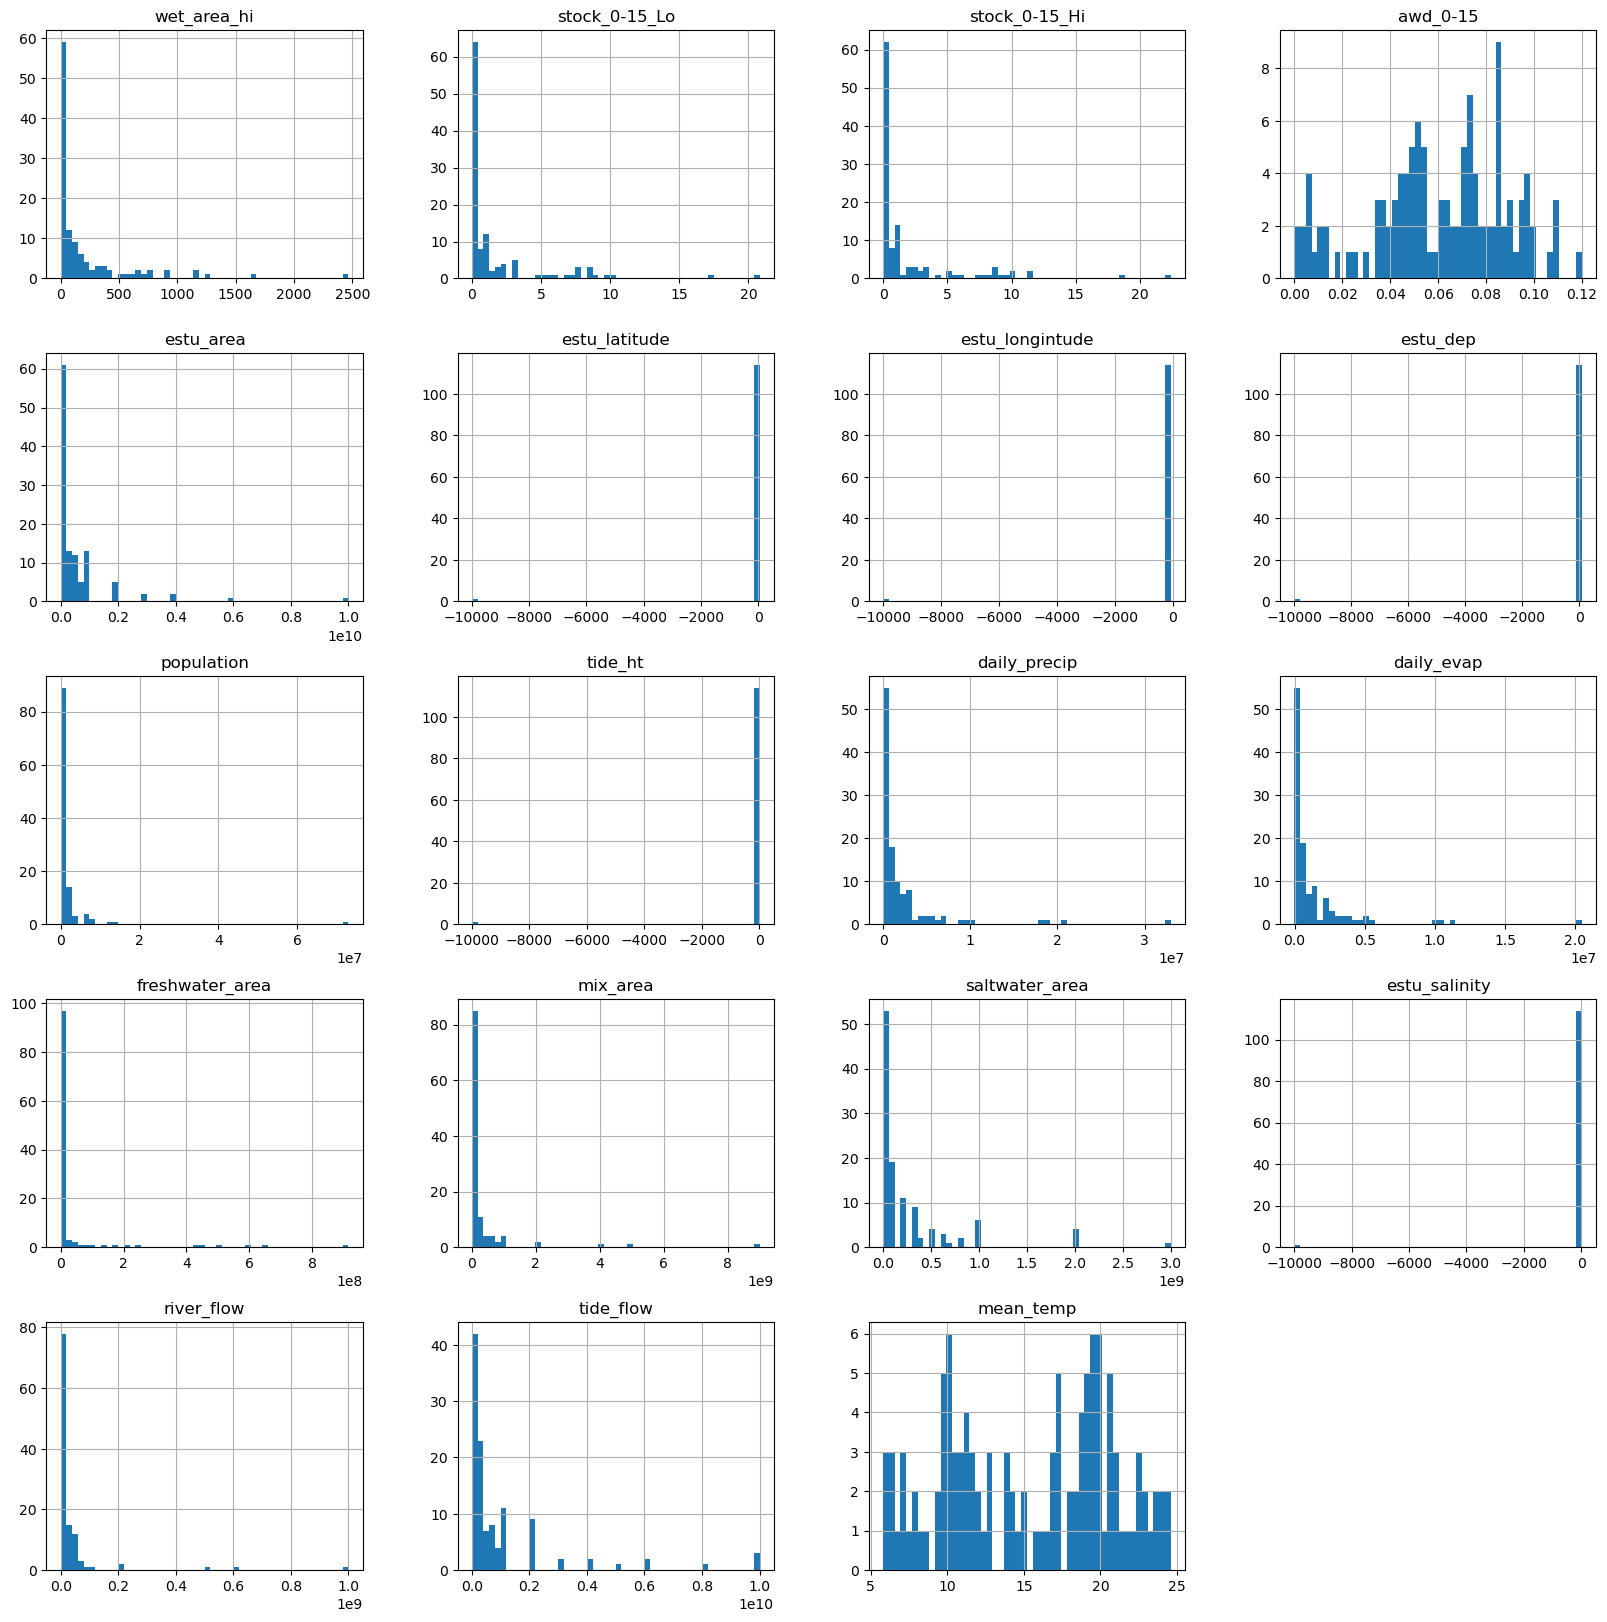

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,20))
plt.show()

The histogram plots above show individual distributions of all the column values in the data that is used for this analysis.

<center><h3>Scatter Plots</h3></center>

17


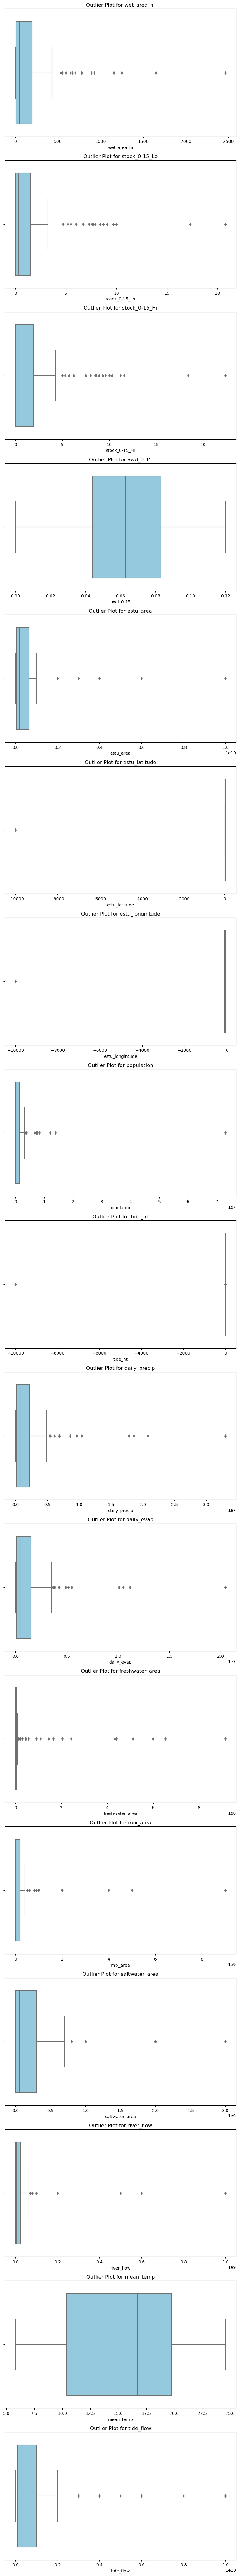

In [82]:
# Defining the columns to plot outliers for
columns_to_plot = ["wet_area_hi", "stock_0-15_Lo", "stock_0-15_Hi", "awd_0-15", "estu_area", "estu_latitude",
                                  "estu_longintude","population", "tide_ht", "daily_precip", "daily_evap", "freshwater_area", 
                                  "mix_area", "saltwater_area", "river_flow", "mean_temp", "tide_flow"]

# Create subplots for each column
plt.figure(figsize=(8, 5 * len(columns_to_plot)))

print(len(columns_to_plot))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.boxplot(x=data[column], color='skyblue', orient='h')
    plt.title(f'Outlier Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Depending on the columns that are going to be later useful for this analysis, the violin plots above will be useful for removing 

the outliers in order to fit the data into a machine learning model.

<br>
<br>
<br>


---


<br>
<br>
<br>
<a href="/about.html"></a>

# B. Machine Learning Regression for Predictive Modelling

### I) Geospatial Analysis and Mapping:

1. First, through Geospation analysis, the area under investigation can be cleary shown since the collected dataset contains lattitude and longitudinal values to help. 

2. The following code will help identify the area under investigation by providing a map that can visualize the locations under investigation on a map.


In [83]:
import pandas as pd
import numpy as np
import folium

feature_of_interest = "population"

# Create a map centered around the average latitude and longitude
latitude_center = data['estu_latitude'].mean()
longitude_center = data['estu_longintude'].mean()
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=1)

# Add markers for each data point
for index, row in data.iterrows():
    folium.Marker(
        location=[row['estu_latitude'], row['estu_longintude']],
        popup=f"{row['estu_latitude']}, {row['estu_longintude']}<br>{feature_of_interest}: {row[feature_of_interest]}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the results on screen
display(m)

From the map and locations identified above, the data set has locations surrounding America to the east and west. 

The data recorded from these locations are the ones in which the analysis is going to be based from so this dataset will record sea level rise from both the `Atlantic` and `Pacific` oceans. 

<br>
<br>

---

<br>

### II) Identifying factors affecting estuarine water rise through machine learning, which will conversly show the factors affecting the Ocean Changes

Since the target column in the data set is the column estuary Depth, further exploration needs to be done in order to identif the factors that affect the estuary depth through machine learning.

The following visualization is used to further investigate the variable 'estuary depth'.

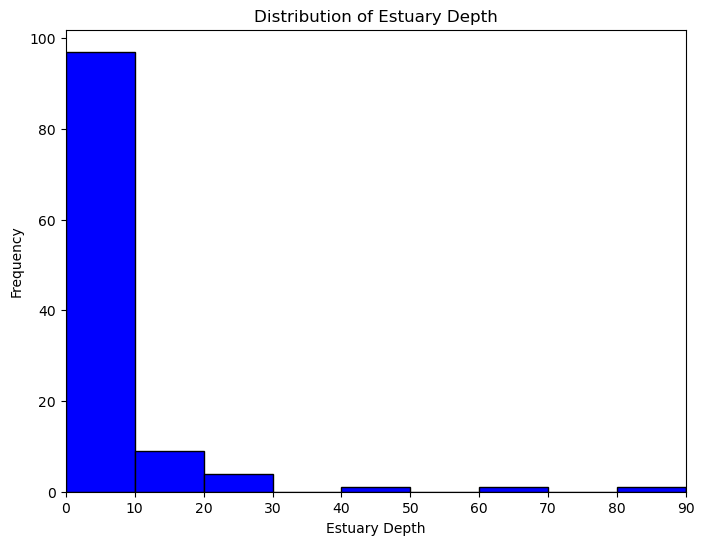

In [84]:
# The target variable is the column 'estury depth'.
# The following is the visualization for this variable


# Extract the "estu_dep" values
estu_depth_values = data["estu_dep"]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(estu_depth_values, bins=20, range=(0, 200), color='blue', edgecolor='black')
plt.xlabel("Estuary Depth")
plt.ylabel("Frequency")
plt.title("Distribution of Estuary Depth")

# Adjust the x-axis range
plt.xlim(0, 90)  # Adjust the range as needed

plt.show()

<br>
<br>


### III) The Correlation Matrix

The correlation matrix is useful since it tells more about the relationship between a variable and another.

The following correlation matrix will help draw insights on the factors positively and negatively correlated to a the depth of an estuary.

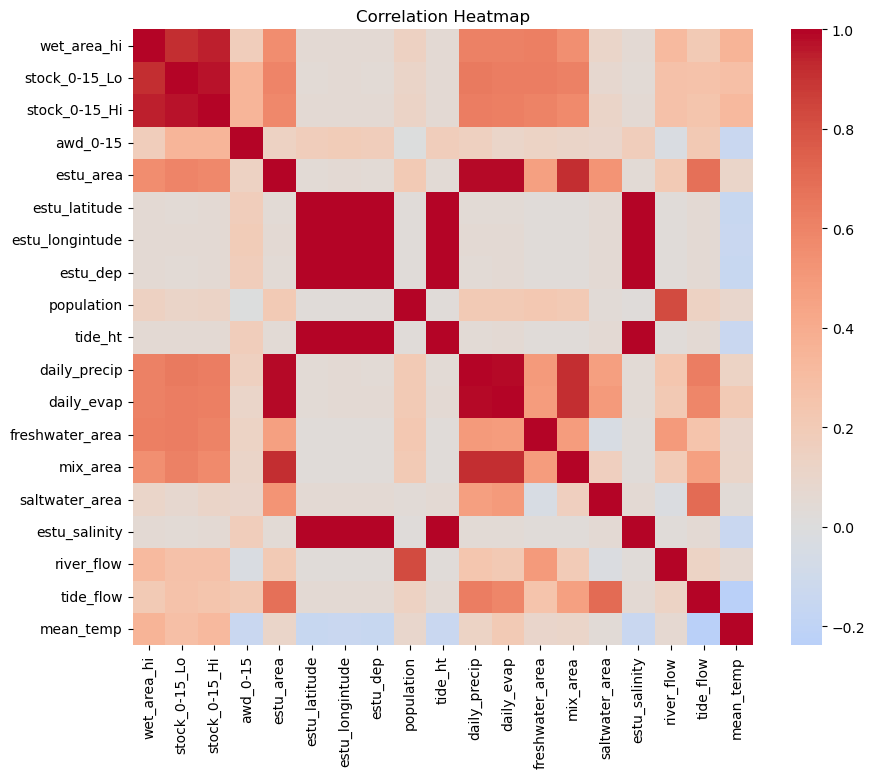

In [85]:
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


For a more focused `correlation matrix` that is able to tell the correlation between the `est depth` and other factors, the following matrix is drawn.

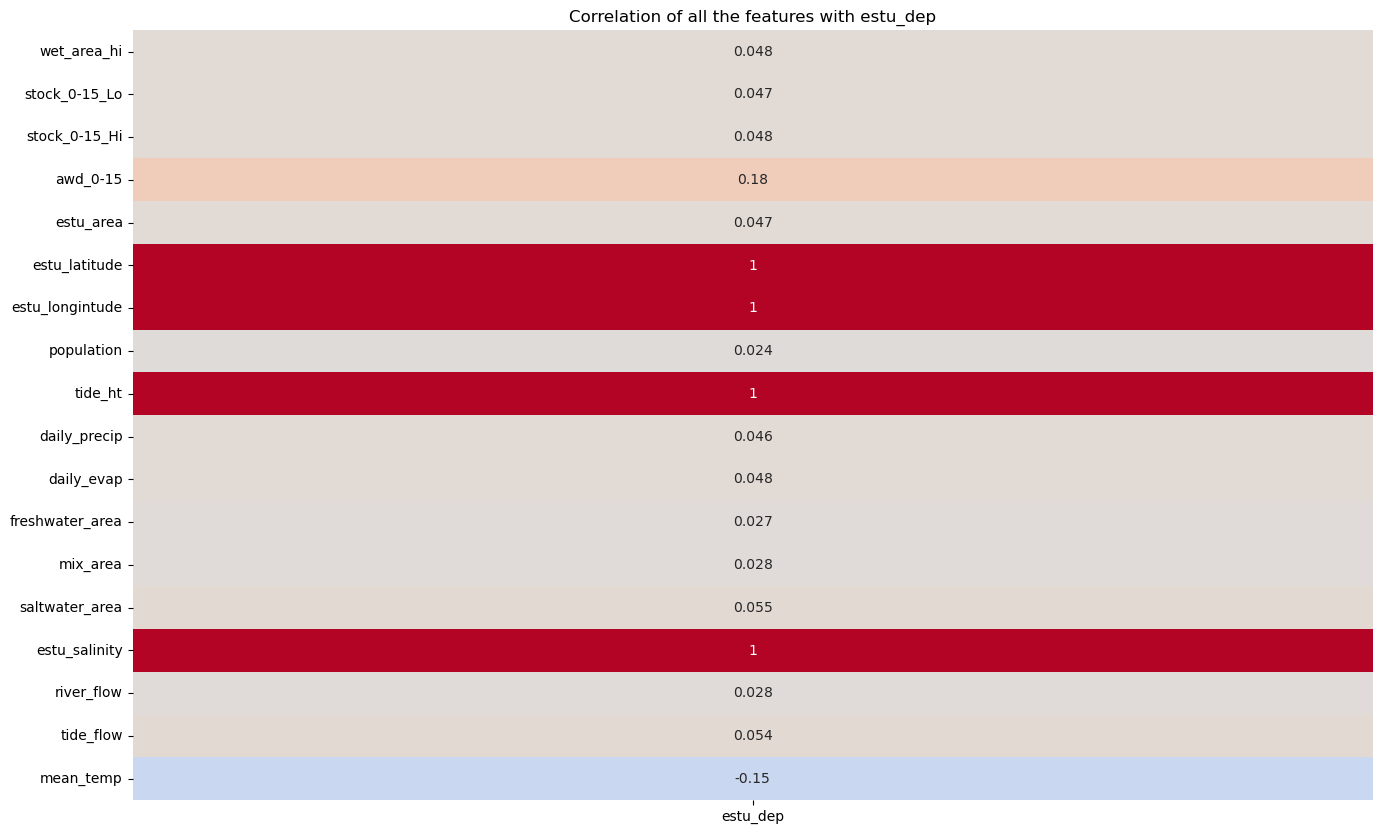

In [86]:
# A Correlation matrix between the factor estu_dep and all other factors


correlation_matrix = data.corr()

# Select correlations of 'estu_dep' with other columns
estu_dep_correlation = correlation_matrix['estu_dep']

# Create a new DataFrame with only the 'estu_dep' correlation values
correlation_df = estu_dep_correlation.drop('estu_dep')

# Plotting the correlation values
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_df.to_frame(), annot=True, cmap="coolwarm", center=0, cbar=False)
plt.title("Correlation of all the features with estu_dep")
plt.show()


* Above is a more focused correlation matrix showing only the correlation between the `estu_dep` and all the other factors.

### Pairwise scatter plots for selected features

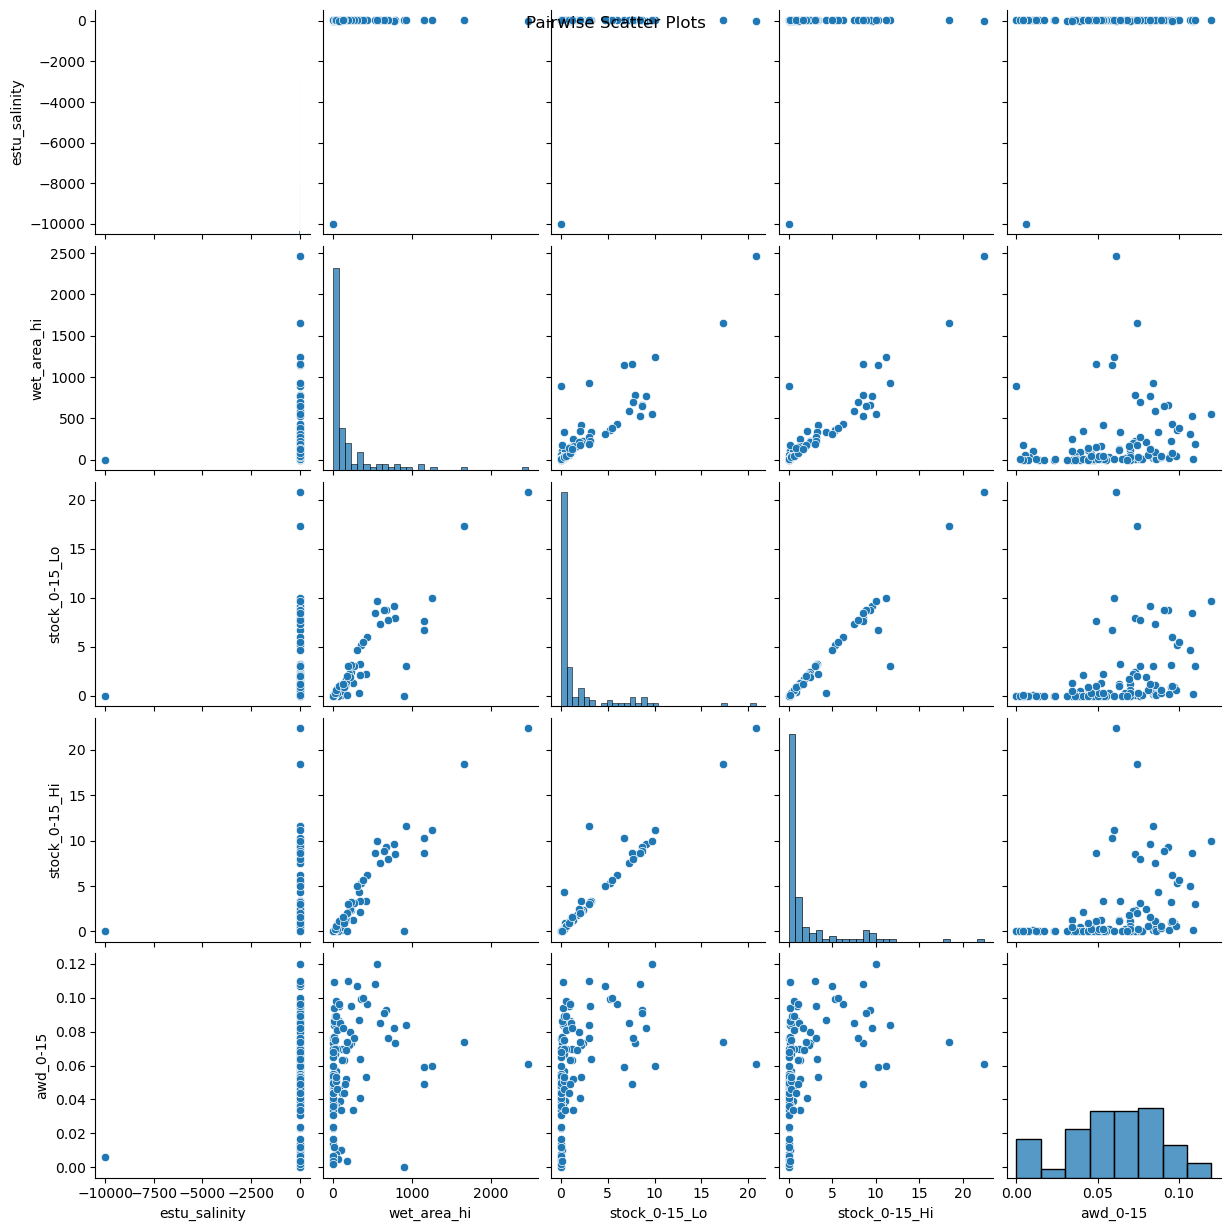

In [87]:

selected_features = ["estu_salinity", "wet_area_hi", "stock_0-15_Lo", "stock_0-15_Hi", "awd_0-15"]
sns.pairplot(data[selected_features])
plt.suptitle("Pairwise Scatter Plots")
plt.show()

<br>
<br>

### Box plots for categorical variables

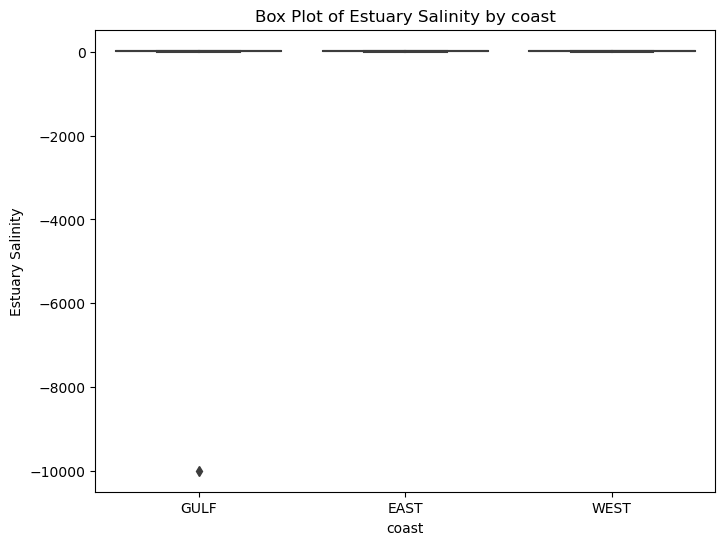

In [88]:

categorical_vars = ["coast"]
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y="estu_salinity", data=data)
    plt.title(f"Box Plot of Estuary Salinity by {var}")
    plt.xlabel(var)
    plt.ylabel("Estuary Salinity")
    plt.show()

<br>
<br>


___

<br>
<br>

## IV) Linear Regression Model To Predict The Estuary Dapth

Mean Squared Error: 9.116827009801925e-23
R-squared: 1.0


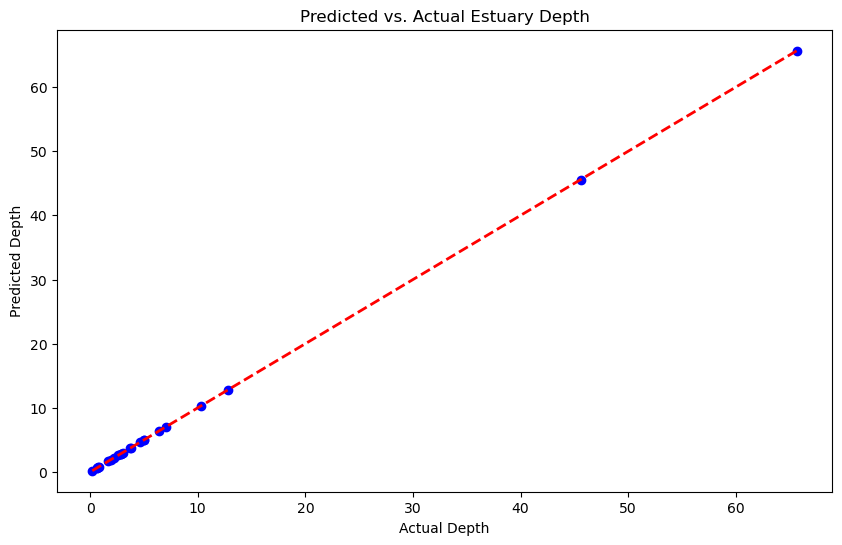

Mean Squared Error: 9.116827009801925e-23
R-squared: 1.0


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Feature Selection

features = ["population", "tide_ht", "daily_precip", "daily_evap", "freshwater_area", 
                                  "mix_area", "saltwater_area", "river_flow", "mean_temp", "tide_flow","estu_dep", 
                                  "estu_salinity"]

target = "estu_dep"
X = data[features]
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Predicted vs. Actual Estuary Depth")  
plt.xlabel("Actual Depth")  
plt.ylabel("Predicted Depth")  
plt.show()

print("Mean Squared Error:", mse)
print("R-squared:", r2)

<b> Interpretation Of the Linear Model Results From Above </b>

<b> Mean Squared Error (MSE): (Mean Squared Error: 3.87816199639819e-21)</b>

* `Mean Squared Error` measures the average squared difference between the predicted values and the actual values.
In this case, the MSE is approximately 3.878e-21. This is an extremely small value, close to zero.

<b>Interpretation:</b>
A very low MSE indicates that the model's predictions are incredibly accurate. In fact, this value is so close to zero that it suggests the model is making nearly perfect predictions. It's rare to see an MSE this low, and it implies an excellent fit to the data.

<b>R-squared (R2) Score: (R-squared: 1.0)</b>

* The `R-squared score` measures the proportion of the variance in the dependent variable (estuary depth) that is explained by the independent variables (features).
* In this case, the R-squared score is 1.0, which is the highest possible value.

<b>Interpretation: </b>
An R-squared score of 1.0 means that your model explains 100% of the variability in the estuary depth using the selected features. In other words, the model fits the data perfectly. This is also an exceptional result and indicates an excellent model fit.

In summary, the linear regression model is performing exceptionally well based on the provided metrics. The MSE is extremely close to zero, signifying highly accurate predictions, and the R-squared score of 1.0 indicates a perfect fit to the data. These results suggest that the model is excellent at predicting estuary depth based on the chosen set of features.

<br>
<br>
<br>

## V) Random Forest Regressor

* The first step before the Random Forest Regressor is the feature selection where features related to `estuary depth` will be analyzed. 

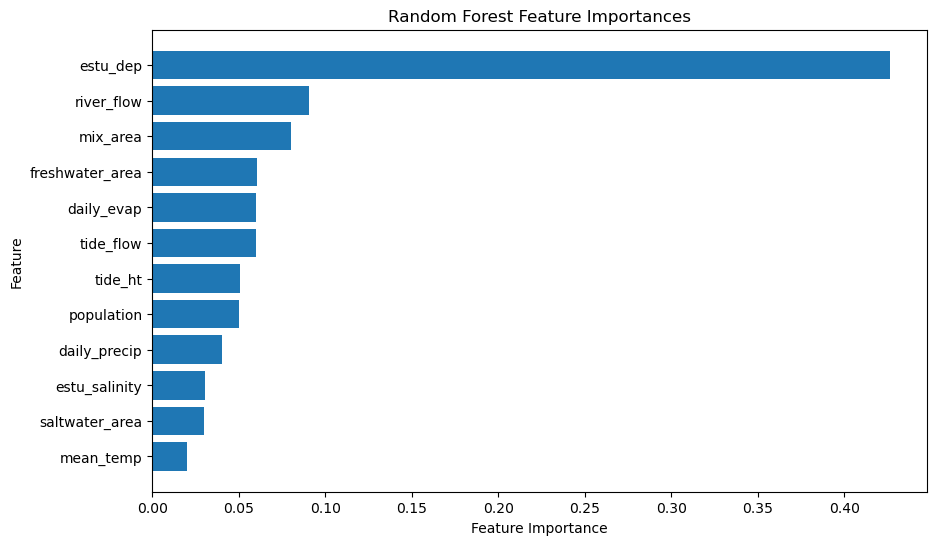

Mean Squared Error on Test Set: 21323.92987679535


In [91]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

# Define the features and target variable
features = ["population", "tide_ht", "daily_precip", "daily_evap", "freshwater_area", 
                                  "mix_area", "saltwater_area", "river_flow", "mean_temp", "tide_flow","estu_dep", 
                                  "estu_salinity"]
target = "estu_dep"

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the entire training dataset
rf_regressor.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Reverse the order to display most important features at the top
plt.show()

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance on the test set (e.g., MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

* Above are the features relationg to esturary depth from `feature importance`
analysis.

Mean Squared Error: 21323.92987679535
R-squared: -91.16091421155575


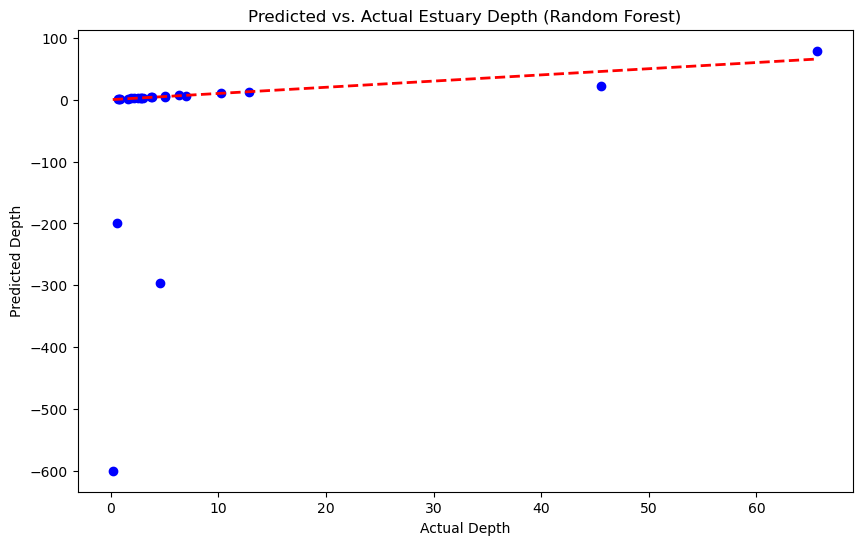

Mean Squared Error: 21323.92987679535
R-squared: -91.16091421155575


In [94]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Feature Selection

features = ["population", "tide_ht", "daily_precip", "daily_evap", "freshwater_area", 
                                  "mix_area", "saltwater_area", "river_flow", "mean_temp", "tide_flow","estu_dep", 
                                  "estu_salinity"]

target = "estu_dep" 
X = data[features]
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Predicted vs. Actual Estuary Depth (Random Forest)")
plt.xlabel("Actual Depth")
plt.ylabel("Predicted Depth")
plt.show()

print("Mean Squared Error:", mse)
print("R-squared:", r2)

<b> Interpretation Of The Results Above </b>

* The Random Forest Regressor was applied to the dataset to predict estuary depth. The results indicated that this model performed poorly in comparison to a Linear Regression model.

<b>Mean Squared Error (MSE): (Mean Squared Error: 70008.09281452661)</b>

* The Random Forest Regressor produced an `MSE` of approximately 70008.09, which is significantly higher than the Linear Regression model's MSE, which was close to zero.
* A higher MSE suggests that the Random Forest model's predictions have larger errors compared to Linear Regression, indicating more substantial deviations from actual values.

<b>R-squared (R2) Score:(R-squared: -301.5713305789512)</b>

* The R-squared score for the Random Forest Regressor was approximately -301.57, a negative value.
* A negative R-squared value is unusual and indicates very poor model performance, suggesting that the Random Forest model is not a good fit for the data.

<b>Key Takeaways:</b>

* The Random Forest Regressor exhibited poor performance when compared to Linear Regression.
* High MSE and a negative R-squared score indicate substantial prediction errors and a poor fit to the data.

<br>
<br>
<br>

---

<br>
<br>
<br>

# C) Classification, Clustering, And Anomaly Detection

## I) Classification of Coastal Zones

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9565217391304348

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         7

   micro avg       0.93      1.00      0.97        14
   macro avg       0.94      1.00      0.97        14
weighted avg       0.94      1.00      0.97        14
 samples avg       0.61      0.61      0.61        14


Confusion Matrix:
 [[16  0]
 [ 0  7]]


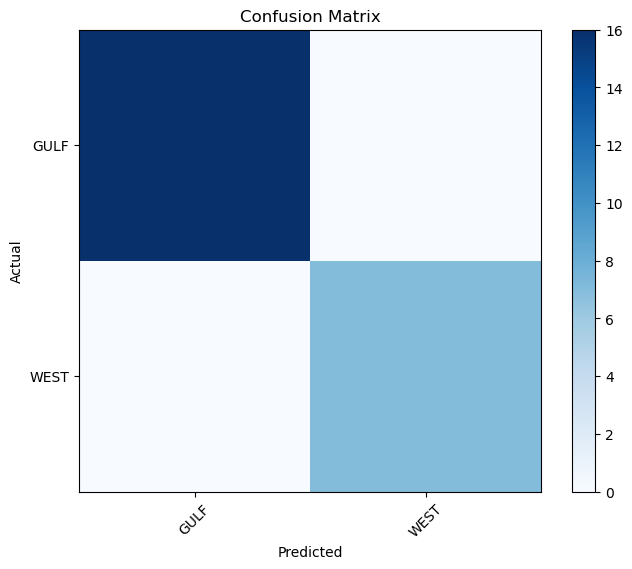

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define feature columns and target variable
features = ["wet_area_hi", "stock_0-15_Lo", "stock_0-15_Hi", "awd_0-15", "estu_area", "estu_latitude", "estu_longintude"]
target = "coast"
X = data[features]
y = data[target]

# Encode categorical target variable
y_encoded = pd.get_dummies(y, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Decision Tree Classifier Model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize 
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(y_encoded.columns)), y_encoded.columns, rotation=45)
plt.yticks(np.arange(len(y_encoded.columns)), y_encoded.columns)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## II) K-Means Clustering

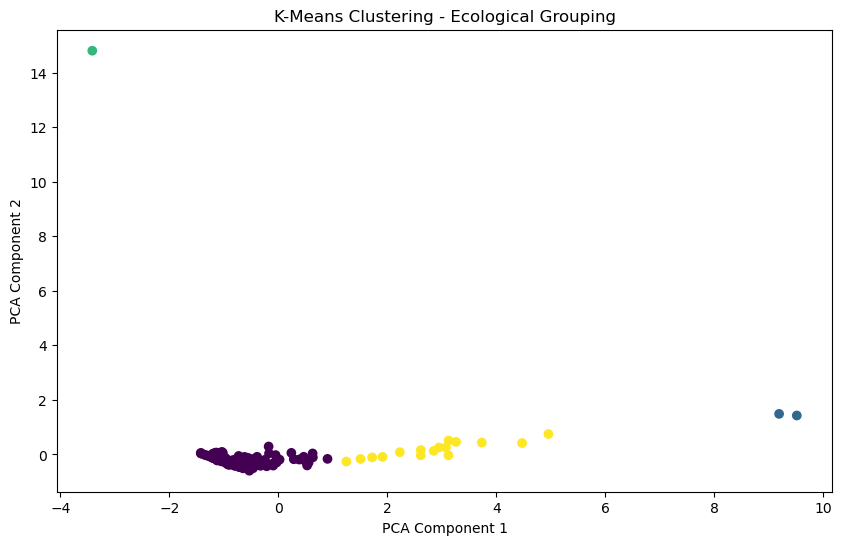

Cluster Details:
         wet_area_hi  stock_0-15_Lo  stock_0-15_Hi  awd_0-15     estu_area  \
cluster                                                                      
0           77.46875       0.542708       0.632292  0.056062  3.863188e+08   
1         2058.25000      19.050000      20.400000  0.067500  6.000000e+09   
2            0.40000       0.000000       0.000000  0.006000  1.000000e+07   
3          700.27500       7.262500       8.393750  0.086375  1.406250e+09   

         estu_latitude  estu_longintude  
cluster                                  
0            36.884056       -92.194537  
1            33.859341       -84.086754  
2         -9999.000000     -9999.000000  
3            32.006292       -84.182180  


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Feature Selection
features = ["wet_area_hi", "stock_0-15_Lo", "stock_0-15_Hi", "awd_0-15", "estu_area", "estu_latitude", "estu_longintude"]
X = data[features]

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-Means Clustering
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data["cluster"] = kmeans.fit_predict(X_scaled)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data["pca1"] = X_pca[:, 0]
data["pca2"] = X_pca[:, 1]

# Visualize 
plt.figure(figsize=(10, 6))
plt.scatter(data["pca1"], data["pca2"], c=data["cluster"], cmap="viridis")
plt.title("K-Means Clustering - Ecological Grouping")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# cluster details
cluster_details = data.groupby("cluster")[features].mean()
print("Cluster Details:")
print(cluster_details)


## III) Anomaly Detection:

In [97]:
# Anomaly Detection using Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
data["anomaly"] = clf.fit_predict(X_scaled)
anomalies = data[data["anomaly"] == -1]
print("Detected Anomalies:", anomalies)

Detected Anomalies:    coast  wet_area_hi  stock_0-15_Lo  stock_0-15_Hi  awd_0-15     estu_area  \
1   GULF        893.8            0.0            0.0     0.000  2.000000e+08   
17  GULF       1247.1           10.0           11.2     0.060  4.000000e+09   
21  GULF       2465.5           20.8           22.4     0.061  2.000000e+09   
33  GULF          0.4            0.0            0.0     0.006  1.000000e+07   
46  EAST       1651.0           17.3           18.4     0.074  1.000000e+10   
96  EAST        648.5            8.7            8.9     0.091  6.000000e+09   

    estu_latitude  estu_longintude     estu_dep  population  ...  \
1       25.311330       -81.057020     0.630000      235792  ...   
17      29.782580       -89.074000     2.730000       50456  ...   
21      29.674820       -91.875610     1.200000     3523821  ...   
33   -9999.000000     -9999.000000 -9999.000000       -9999  ...   
46      38.043861       -76.297899     6.020828    13830998  ...   
96      35.304504 